In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [3]:
restaurant_data = pd.read_csv("C:\\Users\\jaink\\Downloads\\Dataset .csv")


In [4]:
map_center = [restaurant_data['Latitude'].mean(), restaurant_data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=10)


In [5]:
for index, row in restaurant_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)


In [6]:
restaurant_map.save("restaurant_distribution_map.html")


In [7]:
restaurant_groups = restaurant_data.groupby('City')


In [8]:
restaurant_counts = restaurant_groups.size()
print(restaurant_counts)

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Length: 141, dtype: int64


In [11]:
average_ratings = restaurant_groups['Aggregate rating'].mean()
print(average_ratings)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


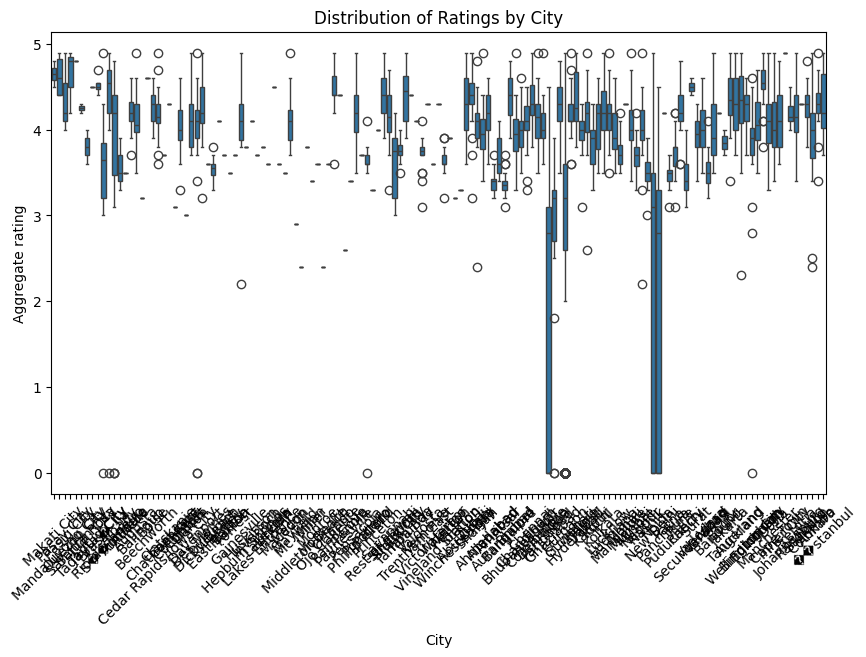

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Aggregate rating', data=restaurant_data)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings by City')
plt.show()

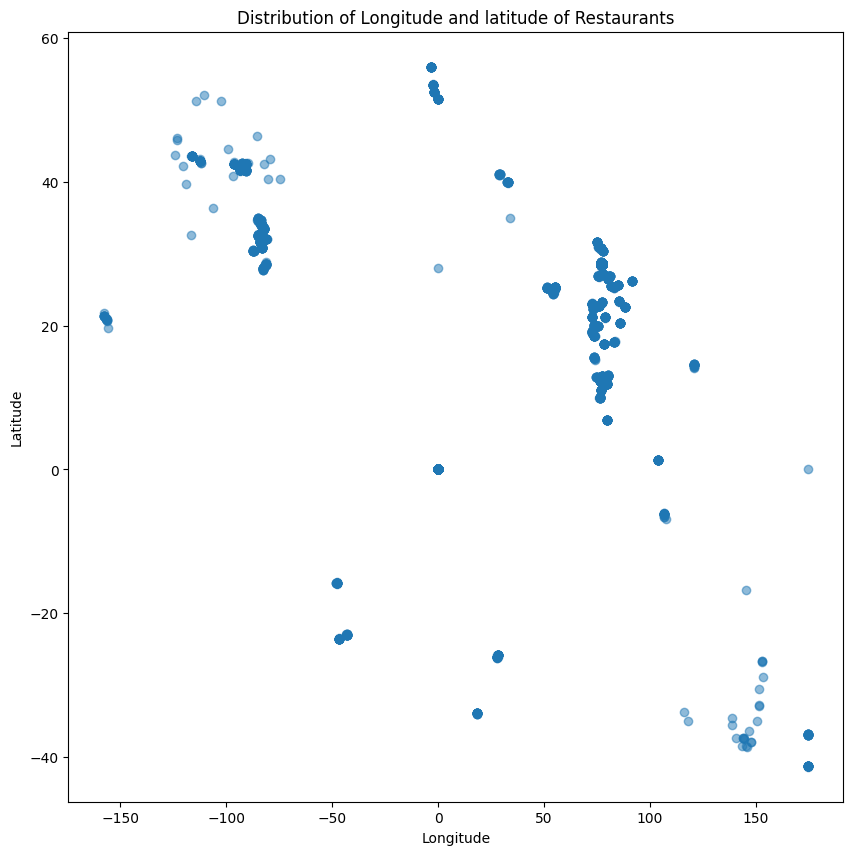

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(restaurant_data['Longitude'], restaurant_data['Latitude'], alpha=0.5)
plt.title('Distribution of Longitude and latitude of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [17]:
citygrp=restaurant_data.groupby("City")
citygrp

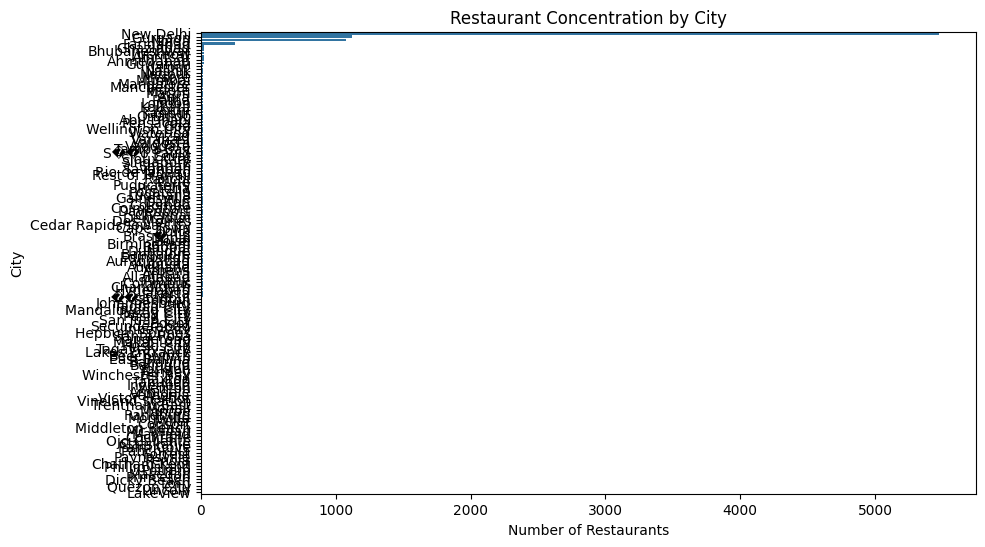

In [18]:
conc = citygrp.size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=conc.values, y=conc.index)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Restaurant Concentration by City')
plt.show()
     

In [19]:
aggregate_ratings = citygrp['Aggregate rating'].mean()
cuisines = citygrp['Cuisines'].apply(lambda x: x.value_counts().index[0] if x.value_counts().size > 0 else None)
price_range = citygrp['Price range'].mean()
stats = pd.DataFrame({'Aggregate Ratings': aggregate_ratings,'Cuisine': cuisines,'Price range': price_range})
print(stats)

                 Aggregate Ratings  \
City                                 
Abu Dhabi                 4.300000   
Agra                      3.965000   
Ahmedabad                 4.161905   
Albany                    3.555000   
Allahabad                 3.395000   
...                            ...   
Weirton                   3.900000   
Wellington City           4.250000   
Winchester Bay            3.200000   
Yorkton                   3.300000   
��stanbul                 4.292857   

                                                           Cuisine  \
City                                                                 
Abu Dhabi                                                 American   
Agra                                         North Indian, Mughlai   
Ahmedabad        Chinese, Italian, North Indian, Mexican, Medit...   
Albany                                      Japanese, Steak, Sushi   
Allahabad                                    North Indian, Chinese   
...            

In [21]:
corr=restaurant_data[['Aggregate rating', 'Price range']].corr()

In [22]:
corr

,Aggregate rating,Price range
Aggregate rating,1.000000,0.437944
Price range,0.437944,1.000000


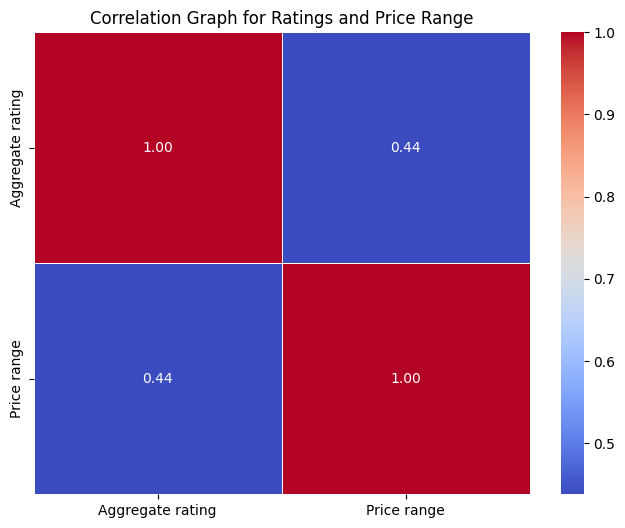

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Graph for Ratings and Price Range')
plt.show()

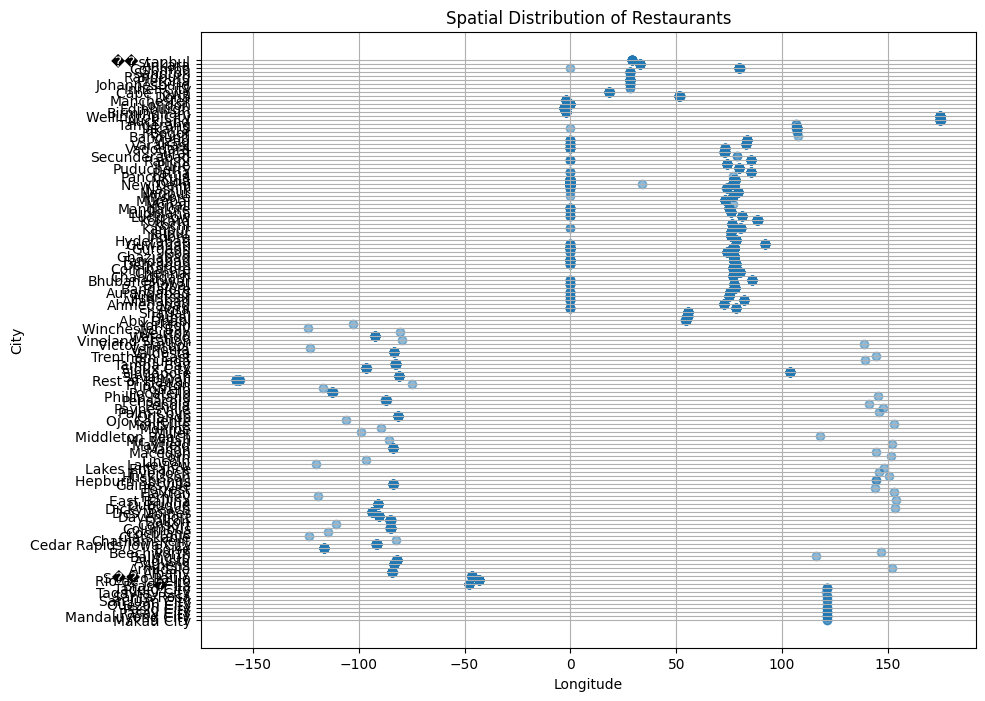

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(restaurant_data['Longitude'], restaurant_data['City'], alpha=0.5)
plt.title('Spatial Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('City')
plt.grid(True)
plt.show()